<a href="https://colab.research.google.com/github/ii200400/Tensorflow_Tutorial/blob/master/08%20-%20Autoencoder/01_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 구현하기!

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 데이터 정의

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

## 모델 구성

### 신경망 옵션과 변수 지정

In [ ]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100

# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

# 다음과 같이 이어지는 레이어를 구성하기 위한 매개변수들이다..
# input -> encode -> decode -> output

# 입력값을 Y로 사용하기 때문에 Y 가 없다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수들
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))


### 신경망 구성

In [ ]:
# sigmoid(X * W + b) 함수를 이용해 신경망 레이어를 구성한다.
# encode 의 출력의 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 크기를 만든다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있다.

# 인코더 레이어 구성
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))
# 디코더 레이어 구성(최종 레이어)
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

### 비용 함수, 최적화 함수 설정

In [ ]:
# 디코더는 인풋과 최대한 같은 결과를 내야 하므로,
# 입력 값인 X 값과 decoder 와의 차이를 손실값으로 설정한다.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## 모델 학습

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

Epoch: 0001 Avg. cost = 0.1903
Epoch: 0002 Avg. cost = 0.0570
Epoch: 0003 Avg. cost = 0.0435
Epoch: 0004 Avg. cost = 0.0391
Epoch: 0005 Avg. cost = 0.0358
Epoch: 0006 Avg. cost = 0.0339
Epoch: 0007 Avg. cost = 0.0317
Epoch: 0008 Avg. cost = 0.0306
Epoch: 0009 Avg. cost = 0.0301
Epoch: 0010 Avg. cost = 0.0295
Epoch: 0011 Avg. cost = 0.0291
Epoch: 0012 Avg. cost = 0.0282
Epoch: 0013 Avg. cost = 0.0279
Epoch: 0014 Avg. cost = 0.0276
Epoch: 0015 Avg. cost = 0.0272
Epoch: 0016 Avg. cost = 0.0270
Epoch: 0017 Avg. cost = 0.0258
Epoch: 0018 Avg. cost = 0.0250
Epoch: 0019 Avg. cost = 0.0239
Epoch: 0020 Avg. cost = 0.0237


### 모델 테스트

[[0.0000000e+00 3.8743019e-07 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.4074993e-06 0.0000000e+00 ... 0.0000000e+00
  2.9802322e-07 0.0000000e+00]
 [1.0085106e-04 7.3015690e-06 1.1920929e-07 ... 0.0000000e+00
  2.2044778e-04 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.4901161e-07 8.9406967e-08]
 [1.1920929e-07 4.7683716e-07 2.9802322e-08 ... 0.0000000e+00
  4.1723251e-07 0.0000000e+00]
 [0.0000000e+00 2.6226044e-06 2.3841858e-07 ... 0.0000000e+00
  1.7881393e-06 0.0000000e+00]]


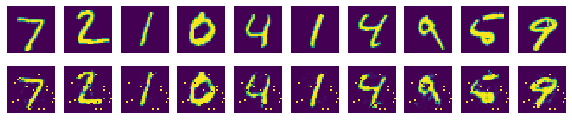

In [ ]:
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해보자. (matplot 활용)
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})
print(samples)

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

## 전체 코드

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.1966
Epoch: 0002 Avg. cost = 0.0621
Epoch: 0003 Avg. cost = 0.0526
Epoch: 0004 Avg. cost = 0.0472
Epoch: 0005 Avg. cost = 0.0435
Epoch: 0006 Avg. cost = 0.0385
Epoch: 0007 Avg. cost = 0.0354
Epoch: 0008 Avg. cost = 0.0346
Epoch: 0009 Avg. cost = 0.0340
Epoch: 0010 Avg. cost = 0.0334
Epoch: 0011 Avg. cost = 0.0330
Epoch: 0012 Avg. cost = 0.0325
Epoch: 0013 Avg. cost = 0.0322
Epoch: 0014 Avg. cost = 0.0317
Epoch: 0015 Avg. cost = 0.0315
Epoch: 0016 Avg. cost = 0.0312
Epoch: 0017 Avg. cost = 0.0310
Epoch: 0018 Avg. cost = 0.0308
Epoch: 0019 Avg. cost = 0.0306
Epoch: 0020 Avg. cost = 0.0305


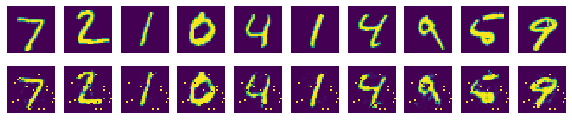

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 및 변수 설정
######

learning_rate = 0.01
training_epoch = 20
batch_size = 100

n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

X = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

#########
# 신경망 모델 구성
######

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

#########
# 결과 확인
# 입력값과 출력값을 matplot을 활용하여 시각적으로 비교
######
sample_size = 10

samples = sess.run(decoder,feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()